<a href="https://colab.research.google.com/github/fjopereira/estado_vacinacao_opendatasus/blob/main/3_Tratando_os_dados_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalhando os CSV para diminuir o tamanho e facilitar o trabalho 

In [ ]:
#imports
import pandas as pd
import seaborn as sns

In [ ]:
sns.set()

In [ ]:
#selecionando colunas
cl_selecionadas = ['paciente_id', 'paciente_endereco_uf']

In [ ]:
#--------------------------------------------------------1

#tive que subir o SP para rodar primeiro, quase que a versão PRO não aguenta

#uf = SP
#criando a df
vacinas_SP = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-SP/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
SP = vacinas_SP.filter(items=cl_selecionadas)
#agrupandos os valores
sp_tratado = SP.groupby('paciente_endereco_uf').count()
#resetando os indices
sp_tratado.reset_index(inplace=True)
#renomeando os campos
sp_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_SP = "" 
SP = "" 

#---------------------------------------------------------

In [ ]:
#criando a df
vacinas_MG = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')

In [ ]:
#analisando a df
vacinas_MG.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,6231782a-15ae-46f7-8df4-663340ebb4a3-i0b0,5f81a75cf8bb7bde93d99ce2a15eb70a13758705aebf2a...,66,1954-12-24,M,1,BRANCA,315250.0,10.0,POUSO ALEGRE,BRASIL,MG,37550.0,B,2215055,PREFEITURA MUNICIPAL DE POUSO ALEGRE,UBS CIDADE JARDIMDR JESUS R PIRES POUSO ALEGRE,315250,POUSO ALEGRE,MG,202,Pessoas de 65 a 69 anos,2.0,Faixa Etária,210096,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-07,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-08T19:10:56.000Z,16341
1,4a3e6626-dd01-45b6-b5ee-581ad3e2523a-i0b0,c0e8981cde1a362702055717ab41f9dd291c87e542f966...,72,1949-02-06,M,1,BRANCA,315560.0,10.0,RIO PARDO DE MINAS,BRASIL,MG,39530.0,B,2172577,PREFEITURA MUNICIPAL DE RIO PARDO DE MINAS,UBS ESPLANADA,315560,RIO PARDO DE MINAS,MG,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210047,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-17,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-17T15:20:59.000Z,16341
2,7dc0ae75-1b2b-4bd0-a94b-265e709dcba1-i0b0,2a5aa6984a910c6d61f3cc753bace60934b45e9a4a008a...,24,1996-10-15,F,1,BRANCA,310420.0,10.0,ARCOS,BRASIL,MG,35588.0,B,2163438,PREFEITURA MUNICIPAL DE OURO PRETO,OURO PRETO POLICLINICA DE OURO PRETO,314610,OURO PRETO,MG,926,Outros,9.0,Trabalhadores de Saúde,213VCD028W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-04-29,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-03T17:32:22.000Z,16341
3,77bc0876-ebf3-44c6-9a7e-88ec9a598ea1-i0b0,1437f6213533b9901a317362732a051f311a6e408a53e9...,25,1995-10-16,F,99,SEM INFORMACAO,312410.0,10.0,ESMERALDAS,BRASIL,MG,35740.0,B,5618312,MUNICIPIO DE BELO HORIZONTE,CENTRO DE SAUDE PADRE JOAQUIM MAIA,310620,BELO HORIZONTE,MG,926,Outros,9.0,Trabalhadores de Saúde,ABX3118,ASTRAZENECA,NaN,2021-06-22,1ª Dose,85,Vacina Covid-19 - Covishield,SIGRAH,2021-06-22T16:45:33.000Z,19788
4,cd12ab3d-1b98-435b-8867-c96e8b8f47bc-i0b0,f6e43871cf3eca7194a2a84f84b09fbfec078104856865...,55,1966-02-26,F,1,BRANCA,310620.0,10.0,BELO HORIZONTE,BRASIL,MG,30666.0,B,2194635,PREFEITURA MUNICIPAL DE REDUTO,CENTRO DE SAUDE DE REDUTO,315415,REDUTO,MG,107,Hipertensão de difícil controle ou com complic...,1.0,Comorbidades,213VCD036Z,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-19,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-25T19:51:41.000Z,16341


informações do df

In [ ]:
#analisando a df
vacinas_MG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9400064 entries, 0 to 9400063
Data columns (total 34 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            int64  
 3   paciente_datanascimento                   object 
 4   paciente_enumsexobiologico                object 
 5   paciente_racacor_codigo                   int64  
 6   paciente_racacor_valor                    object 
 7   paciente_endereco_coibgemunicipio         float64
 8   paciente_endereco_copais                  float64
 9   paciente_endereco_nmmunicipio             object 
 10  paciente_endereco_nmpais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_endereco_cep                     float64
 13  paciente_nacionalidade_enumnacionalidade  object 
 14  es

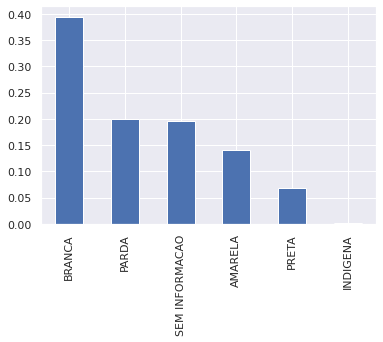

In [ ]:
#plot gráfico para teste
vacinas_MG.paciente_racacor_valor.value_counts(normalize=True).plot(kind='bar')

In [ ]:
#retornando somenete o campo com as UFs
vacinas_MG.paciente_endereco_uf

0          MG
1          MG
2          MG
3          MG
4          MG
           ..
9400059    MG
9400060    MG
9400061    MG
9400062    MG
9400063    MG
Name: paciente_endereco_uf, Length: 9400064, dtype: object

In [ ]:
#contando valores
vacinas_MG.paciente_endereco_uf.value_counts()

MG    9118243
SP      97594
RJ      34799
ES      19394
GO      18219
BA      16902
DF      13760
PR       5854
SC       3301
MT       3238
PA       3183
MS       2806
RS       2625
PE       2372
CE       2281
AL       2218
MA       1988
TO       1894
RO       1808
PB       1250
RN       1140
AM       1016
SE        892
PI        885
XX        537
AC        345
RR        317
AP        232
Name: paciente_endereco_uf, dtype: int64

In [ ]:
#criando um novo df com as colunas selecionadas
MG = vacinas_MG.filter(items=cl_selecionadas)                               

In [ ]:
#analisando o df
MG.head()

,paciente_id,paciente_endereco_uf
0,5f81a75cf8bb7bde93d99ce2a15eb70a13758705aebf2a...,MG
1,c0e8981cde1a362702055717ab41f9dd291c87e542f966...,MG
2,2a5aa6984a910c6d61f3cc753bace60934b45e9a4a008a...,MG
3,1437f6213533b9901a317362732a051f311a6e408a53e9...,MG
4,f6e43871cf3eca7194a2a84f84b09fbfec078104856865...,MG


In [ ]:
#agrupandos e contantdo os valores
mg_tratado = MG.groupby('paciente_endereco_uf').count()

In [ ]:
#resetando os indices
mg_tratado.reset_index(inplace=True)

In [ ]:
#renomeando os campos
mg_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)

In [ ]:
#limpando memória
vacinas_MG = ''
MG = ''

In [ ]:
#importando o csv que tinha montado com a população dos estados
df_populacao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/populacao/estados_habitantes.csv', sep=';')

In [ ]:
df_populacao

,Unnamed: 0,Estado,Habitantes,UF,Observação
0,0,São Paulo,44.840.384,SP,Localizado na Região Sudeste
1,1,Minas Gerais,21.292.666,MG,Localizado na Região Sudeste
2,2,Rio de Janeiro,17.366.189,RJ,Localizado na Região Sudeste
3,3,Bahia,14.930.634,BA,Localizado na Região Nordeste
4,4,Paraná,11.516.840,PR,Localizado na Região Sul
5,5,Rio Grande do Sul,11.422.973,RS,Localizado na Região Sul
6,6,Pernambuco,9.616.621,PE,Localizado na Região Nordeste
7,7,Ceará,9.187.103,CE,Localizado na Região Nordeste
8,8,Pará,8.690.745,PA,Localizado na Região Norte
9,9,Santa Catarina,7.252.502,SC,Localizado na Região Sul


In [ ]:
mg_tratado

,UF,QTDE_VACINADOS
0,AC,345
1,AL,2218
2,AM,1016
3,AP,232
4,BA,16902
5,CE,2281
6,DF,13760
7,ES,19394
8,GO,18219
9,MA,1988


In [ ]:
#merge com os dois dfs para teste
df_completo = pd.merge(mg_tratado, df_populacao, how='outer')

In [ ]:
df_completo

,UF,QTDE_VACINADOS,Unnamed: 0,Estado,Habitantes,Observação
0,AC,345,24.0,Acre,894.470,Localizado na Região Norte
1,AL,2218,17.0,Alagoas,3.351.543,Localizado na Região Nordeste
2,AM,1016,12.0,Amazonas,4.207.714,Localizado na Região Norte
3,AP,232,25.0,Amapá,861.773,Localizado na Região Norte
4,BA,16902,3.0,Bahia,14.930.634,Localizado na Região Nordeste
5,CE,2281,7.0,Ceará,9.187.103,Localizado na Região Nordeste
6,DF,13760,19.0,Distrito Federal,3.055.149,Localizado na Região Centro-Oeste
7,ES,19394,13.0,Espírito Santo,4.064.052,Localizado na Região Sudeste
8,GO,18219,11.0,Goiás,7.113.540,Localizado na Região Centro-Oeste
9,MA,1988,10.0,Maranhão,7.114.598,Localizado na Região Nordeste


In [ ]:
#repetindo o processo para o AC
################################################
#criando a df
vacinas_AC = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-AC/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
AC = vacinas_AC.filter(items=cl_selecionadas) 
#agrupandos os valores
ac_tratado = AC.groupby('paciente_endereco_uf').count()
#resetando os indices
ac_tratado.reset_index(inplace=True)
#renomeando os campos
ac_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_AC = ''
AC = ''
################################################

In [ ]:
ac_tratado

,UF,QTDE_VACINADOS
0,AC,351195
1,AL,50
2,AM,2825
3,AP,33
4,BA,209
5,CE,327
6,DF,200
7,ES,139
8,GO,642
9,MA,93


In [ ]:
#lista das UFs
ufs =[#'AC',
          'AL',
          'AM',
          'AP',
          'BA',
          'CE',
          'DF',
          'ES',
          'GO',
          'MA',
          #'MG',
          'MS',
          'MT',
          'PA',
          'PB',
          'PE',
          'PI',
          'PR',
          'RJ',
          'RN',
          'RO',
          'RR',
          'RS',
          'SC',
          'SE',
          'SP',
          'TO'
]

In [ ]:

#montando as linhas dos scripts para automatizar 

#criando a df
linha1 = "vacinas_{} = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-{}/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')"
#criando um novo df com as colunas selecionadas
linha2 = "{} = vacinas_{}.filter(items=cl_selecionadas)" 
#agrupandos os valores
linha3 = "{}_tratado = {}.groupby('paciente_endereco_uf').count()"
#resetando os indices
linha4 = "{}_tratado.reset_index(inplace=True)"
#renomeando os campos
linha5 = "{}_tratado"
linha5_complemento = ".rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)"
#limpando memória
linha6 = 'vacinas_{} = "" '
linha7 = '{} = "" '

dfs = []
#loop montanto os scripts
for uf in ufs:
  print("#---------------------------------------------------------")
  print("")
  print('#uf = ' + str(uf))
  print("#criando a df")
  print(linha1.format(uf, uf))
  print("#criando um novo df com as colunas selecionadas")
  print(linha2.format(uf, uf))
  print("#agrupandos os valores")
  print(linha3.format(uf.lower(), uf))
  print("#resetando os indices")
  print(linha4.format(uf.lower()))
  print("#renomeando os campos")
  print(linha5.format(uf.lower()) + linha5_complemento)
  print("#limpando memória")
  print(linha6.format(uf))
  print(linha7.format(uf))
  print("")
  print("#---------------------------------------------------------")
  #montando uma lista com as dfs_tratadas
  dfs.append(linha5.format(uf.lower())) 
  

#---------------------------------------------------------

#uf = AL
#criando a df
vacinas_AL = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-AL/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
AL = vacinas_AL.filter(items=cl_selecionadas)
#agrupandos os valores
al_tratado = AL.groupby('paciente_endereco_uf').count()
#resetando os indices
al_tratado.reset_index(inplace=True)
#renomeando os campos
al_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_AL = "" 
AL = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = AM
#criando a df
vacinas_AM = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-AM/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
AM = vacinas_AM.

In [ ]:
dfs

['al_tratado',
 'am_tratado',
 'ap_tratado',
 'ba_tratado',
 'ce_tratado',
 'df_tratado',
 'es_tratado',
 'go_tratado',
 'ma_tratado',
 'ms_tratado',
 'mt_tratado',
 'pa_tratado',
 'pb_tratado',
 'pe_tratado',
 'pi_tratado',
 'pr_tratado',
 'rj_tratado',
 'rn_tratado',
 'ro_tratado',
 'rr_tratado',
 'rs_tratado',
 'sc_tratado',
 'se_tratado',
 'sp_tratado',
 'to_tratado']

In [ ]:
#--------------------------------------------------------2

#uf = AL
#criando a df
vacinas_AL = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-AL/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
AL = vacinas_AL.filter(items=cl_selecionadas)
#agrupandos os valores
al_tratado = AL.groupby('paciente_endereco_uf').count()
#resetando os indices
al_tratado.reset_index(inplace=True)
#renomeando os campos
al_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_AL = "" 
AL = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = AM
#criando a df
vacinas_AM = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-AM/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
AM = vacinas_AM.filter(items=cl_selecionadas)
#agrupandos os valores
am_tratado = AM.groupby('paciente_endereco_uf').count()
#resetando os indices
am_tratado.reset_index(inplace=True)
#renomeando os campos
am_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_AM = "" 
AM = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = AP
#criando a df
vacinas_AP = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-AP/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
AP = vacinas_AP.filter(items=cl_selecionadas)
#agrupandos os valores
ap_tratado = AP.groupby('paciente_endereco_uf').count()
#resetando os indices
ap_tratado.reset_index(inplace=True)
#renomeando os campos
ap_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_AP = "" 
AP = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = BA
#criando a df
vacinas_BA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-BA/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
BA = vacinas_BA.filter(items=cl_selecionadas)
#agrupandos os valores
ba_tratado = BA.groupby('paciente_endereco_uf').count()
#resetando os indices
ba_tratado.reset_index(inplace=True)
#renomeando os campos
ba_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_BA = "" 
BA = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = CE
#criando a df
vacinas_CE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-CE/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
CE = vacinas_CE.filter(items=cl_selecionadas)
#agrupandos os valores
ce_tratado = CE.groupby('paciente_endereco_uf').count()
#resetando os indices
ce_tratado.reset_index(inplace=True)
#renomeando os campos
ce_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_CE = "" 
CE = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = DF
#criando a df
vacinas_DF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-DF/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
DF = vacinas_DF.filter(items=cl_selecionadas)
#agrupandos os valores
df_tratado = DF.groupby('paciente_endereco_uf').count()
#resetando os indices
df_tratado.reset_index(inplace=True)
#renomeando os campos
df_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_DF = "" 
DF = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = ES
#criando a df
vacinas_ES = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-ES/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
ES = vacinas_ES.filter(items=cl_selecionadas)
#agrupandos os valores
es_tratado = ES.groupby('paciente_endereco_uf').count()
#resetando os indices
es_tratado.reset_index(inplace=True)
#renomeando os campos
es_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_ES = "" 
ES = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = GO
#criando a df
vacinas_GO = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-GO/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
GO = vacinas_GO.filter(items=cl_selecionadas)
#agrupandos os valores
go_tratado = GO.groupby('paciente_endereco_uf').count()
#resetando os indices
go_tratado.reset_index(inplace=True)
#renomeando os campos
go_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_GO = "" 
GO = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = MA
#criando a df
vacinas_MA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-MA/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
MA = vacinas_MA.filter(items=cl_selecionadas)
#agrupandos os valores
ma_tratado = MA.groupby('paciente_endereco_uf').count()
#resetando os indices
ma_tratado.reset_index(inplace=True)
#renomeando os campos
ma_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_MA = "" 
MA = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = MS
#criando a df
vacinas_MS = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-MS/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
MS = vacinas_MS.filter(items=cl_selecionadas)
#agrupandos os valores
ms_tratado = MS.groupby('paciente_endereco_uf').count()
#resetando os indices
ms_tratado.reset_index(inplace=True)
#renomeando os campos
ms_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_MS = "" 
MS = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = MT
#criando a df
vacinas_MT = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-MT/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
MT = vacinas_MT.filter(items=cl_selecionadas)
#agrupandos os valores
mt_tratado = MT.groupby('paciente_endereco_uf').count()
#resetando os indices
mt_tratado.reset_index(inplace=True)
#renomeando os campos
mt_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_MT = "" 
MT = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = PA
#criando a df
vacinas_PA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-PA/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
PA = vacinas_PA.filter(items=cl_selecionadas)
#agrupandos os valores
pa_tratado = PA.groupby('paciente_endereco_uf').count()
#resetando os indices
pa_tratado.reset_index(inplace=True)
#renomeando os campos
pa_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_PA = "" 
PA = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = PB
#criando a df
vacinas_PB = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-PB/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
PB = vacinas_PB.filter(items=cl_selecionadas)
#agrupandos os valores
pb_tratado = PB.groupby('paciente_endereco_uf').count()
#resetando os indices
pb_tratado.reset_index(inplace=True)
#renomeando os campos
pb_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_PB = "" 
PB = "" 

#---------------------------------------------------------


In [ ]:
#--------------------------------------------------------3

#uf = PE
#criando a df
vacinas_PE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-PE/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
PE = vacinas_PE.filter(items=cl_selecionadas)
#agrupandos os valores
pe_tratado = PE.groupby('paciente_endereco_uf').count()
#resetando os indices
pe_tratado.reset_index(inplace=True)
#renomeando os campos
pe_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_PE = "" 
PE = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = PI
#criando a df
vacinas_PI = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-PI/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
PI = vacinas_PI.filter(items=cl_selecionadas)
#agrupandos os valores
pi_tratado = PI.groupby('paciente_endereco_uf').count()
#resetando os indices
pi_tratado.reset_index(inplace=True)
#renomeando os campos
pi_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_PI = "" 
PI = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = PR
#criando a df
vacinas_PR = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-PR/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
PR = vacinas_PR.filter(items=cl_selecionadas)
#agrupandos os valores
pr_tratado = PR.groupby('paciente_endereco_uf').count()
#resetando os indices
pr_tratado.reset_index(inplace=True)
#renomeando os campos
pr_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_PR = "" 
PR = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = RJ
#criando a df
vacinas_RJ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-RJ/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
RJ = vacinas_RJ.filter(items=cl_selecionadas)
#agrupandos os valores
rj_tratado = RJ.groupby('paciente_endereco_uf').count()
#resetando os indices
rj_tratado.reset_index(inplace=True)
#renomeando os campos
rj_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_RJ = "" 
RJ = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = RN
#criando a df
vacinas_RN = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-RN/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
RN = vacinas_RN.filter(items=cl_selecionadas)
#agrupandos os valores
rn_tratado = RN.groupby('paciente_endereco_uf').count()
#resetando os indices
rn_tratado.reset_index(inplace=True)
#renomeando os campos
rn_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_RN = "" 
RN = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = RO
#criando a df
vacinas_RO = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-RO/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
RO = vacinas_RO.filter(items=cl_selecionadas)
#agrupandos os valores
ro_tratado = RO.groupby('paciente_endereco_uf').count()
#resetando os indices
ro_tratado.reset_index(inplace=True)
#renomeando os campos
ro_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_RO = "" 
RO = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = RR
#criando a df
vacinas_RR = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-RR/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
RR = vacinas_RR.filter(items=cl_selecionadas)
#agrupandos os valores
rr_tratado = RR.groupby('paciente_endereco_uf').count()
#resetando os indices
rr_tratado.reset_index(inplace=True)
#renomeando os campos
rr_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_RR = "" 
RR = "" 

#---------------------------------------------------------


In [ ]:
#--------------------------------------------------------4

#uf = RS
#criando a df
vacinas_RS = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-RS/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
RS = vacinas_RS.filter(items=cl_selecionadas)
#agrupandos os valores
rs_tratado = RS.groupby('paciente_endereco_uf').count()
#resetando os indices
rs_tratado.reset_index(inplace=True)
#renomeando os campos
rs_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_RS = "" 
RS = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = SC
#criando a df
vacinas_SC = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-SC/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
SC = vacinas_SC.filter(items=cl_selecionadas)
#agrupandos os valores
sc_tratado = SC.groupby('paciente_endereco_uf').count()
#resetando os indices
sc_tratado.reset_index(inplace=True)
#renomeando os campos
sc_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_SC = "" 
SC = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = SE
#criando a df
vacinas_SE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-SE/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
SE = vacinas_SE.filter(items=cl_selecionadas)
#agrupandos os valores
se_tratado = SE.groupby('paciente_endereco_uf').count()
#resetando os indices
se_tratado.reset_index(inplace=True)
#renomeando os campos
se_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_SE = "" 
SE = "" 

#---------------------------------------------------------
#---------------------------------------------------------

#uf = TO
#criando a df
vacinas_TO = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-TO/part-00000-4be03acd-26b6-492d-97b9-1c50eb75a4a0.c000.csv', sep=';')
#criando um novo df com as colunas selecionadas
TO = vacinas_TO.filter(items=cl_selecionadas)
#agrupandos os valores
to_tratado = TO.groupby('paciente_endereco_uf').count()
#resetando os indices
to_tratado.reset_index(inplace=True)
#renomeando os campos
to_tratado.rename(columns={'paciente_endereco_uf': 'UF', 'paciente_id': 'QTDE_VACINADOS' }, inplace=True)
#limpando memória
vacinas_TO = "" 
TO = "" 

#---------------------------------------------------------

In [ ]:
to_tratado.head()

,UF,QTDE_VACINADOS
0,AC,29
1,AL,165
2,AM,102
3,AP,80
4,BA,1412


In [ ]:
dfs_concat = pd.concat([ac_tratado,
mg_tratado,
al_tratado,
am_tratado,
ap_tratado,
ba_tratado,
ce_tratado,
df_tratado,
es_tratado,
go_tratado,
ma_tratado,
ms_tratado,
mt_tratado,
pa_tratado,
pb_tratado,
pe_tratado,
pi_tratado,
pr_tratado,
rj_tratado,
rn_tratado,
ro_tratado,
rr_tratado,
rs_tratado,
sc_tratado,
se_tratado,
sp_tratado,
to_tratado])

In [ ]:
dfs_concat.head(100)

,UF,QTDE_VACINADOS
0,AC,351195
1,AL,50
2,AM,2825
3,AP,33
4,BA,209
...,...,...
11,MS,889
12,MT,1286
13,PA,19940
14,PB,1039


In [ ]:
#agrupandos e somando os valores
df_total = dfs_concat.groupby('UF').sum()

In [ ]:
#resetando os indices
df_total.reset_index(inplace=True)

In [ ]:
#renomeando os campos
to_tratado.rename(columns={'QTDE_VACINADOS': 'Vacinados' }, inplace=True)

In [ ]:
df_total

,UF,QTDE_VACINADOS
0,AC,369829
1,AL,1434080
2,AM,1791391
3,AP,273316
4,BA,6149381
5,CE,3265511
6,DF,1295134
7,ES,2232965
8,GO,3118363
9,MA,2978826


In [ ]:
#merge com os dois dfs para teste
df_final = pd.merge(df_total, df_populacao, how='outer')

In [ ]:
df_final

,UF,QTDE_VACINADOS,Unnamed: 0,Estado,Habitantes,Observação
0,AC,369829,24.0,Acre,894.470,Localizado na Região Norte
1,AL,1434080,17.0,Alagoas,3.351.543,Localizado na Região Nordeste
2,AM,1791391,12.0,Amazonas,4.207.714,Localizado na Região Norte
3,AP,273316,25.0,Amapá,861.773,Localizado na Região Norte
4,BA,6149381,3.0,Bahia,14.930.634,Localizado na Região Nordeste
5,CE,3265511,7.0,Ceará,9.187.103,Localizado na Região Nordeste
6,DF,1295134,19.0,Distrito Federal,3.055.149,Localizado na Região Centro-Oeste
7,ES,2232965,13.0,Espírito Santo,4.064.052,Localizado na Região Sudeste
8,GO,3118363,11.0,Goiás,7.113.540,Localizado na Região Centro-Oeste
9,MA,2978826,10.0,Maranhão,7.114.598,Localizado na Região Nordeste


In [ ]:
#baixando para trabalhar em outro notebook e não ter que processar isso tudo de novo
from google.colab import files
df_final.to_csv('estados_vacinacao.csv', sep=';', index='False')
files.download('estados_vacinacao.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>